#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### VARIOUS CHAPTERS
**Simulations, graphs**

version 0.91 2020-10-02

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from plotnine import *

warnings.filterwarnings("ignore")


In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_out = dirname + "da_case_studies/da_illustrations/"
output = dirname + "da_case_studies/da_illustrations//output/"

func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [3]:
# Import the prewritten helper functions
from py_helper_functions import *


In [4]:
# CHAPTER 06

# ch6-figure-2

from scipy.stats import t, nct

df = 200
x = np.arange(-2.5, 2.5, 0.01).round(3)
d = t.pdf(x, df)

data = pd.DataFrame({"x": x, "d": d})


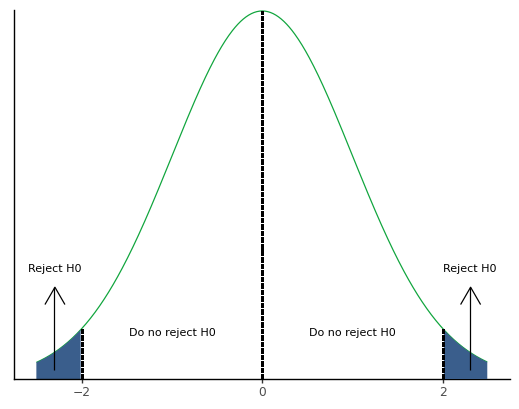

<ggplot: (394511065)>

In [5]:
(
    ggplot(data, aes(x="x", y="d"))
    + geom_line(color=color[1])
    + geom_area(data[data["x"] < -2], fill=color[0], alpha=0.8)
    + geom_area(data[data["x"] > 2], fill=color[0], alpha=0.8)
    + geom_segment(
        aes(x=-2, y=0, xend=-2, yend=data.loc[data["x"] == -2, "d"].values),
        linetype="dashed",
    )
    + geom_segment(
        aes(x=0, y=0, xend=0, yend=data.loc[data["x"] == 0, "d"].values),
        linetype="dashed",
    )
    + geom_segment(
        aes(x=2, y=0, xend=2, yend=data.loc[data["x"] == 2, "d"].values),
        linetype="dashed",
    )
    + annotate("text", x=-1, y=0.05, label="Do no reject H0", size=8)
    + annotate(geom="text", x=1, y=0.05, label="Do no reject H0", size=8)
    + annotate(geom="segment", x=-2.3, y=0.01, xend=-2.3, yend=0.1, arrow=arrow())
    + annotate(geom="text", x=-2.3, y=0.12, label="Reject H0", size=8)
    + annotate(geom="segment", x=2.3, y=0.01, xend=2.3, yend=0.1, arrow=arrow())
    + annotate(geom="text", x=2.3, y=0.12, label="Reject H0", size=8)
    + labs(y="", x="")
    + scale_y_continuous(limits=(0, 0.4), breaks=(), expand=(0, 0))
    + scale_x_continuous(breaks=(-2, 0, 2))
    + theme_bw()
    + theme(
        panel_border=element_blank(),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(colour="black"),
    )
)


In [6]:
# ch6-figure-3

df = 200
x = np.arange(-3, 6, 0.01).round(3)
d = t.pdf(x, df)

nc = 2.6
d2 = nct.pdf(x, df, nc)

d = pd.DataFrame({"x": x, "y": d, "line": "d", "fill": None})
d2 = pd.DataFrame({"x": x, "y": d2, "line": "d2", "fill": None})

d2.loc[d2["x"] < 2, "fill"] = "#541352"
d2.loc[d2["x"] > 2, "fill"] = "#3a5e8c"

data = pd.concat([d, d2], axis=0)


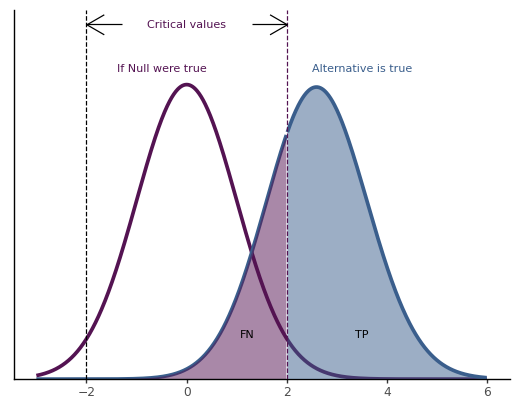

<ggplot: (394704854)>

In [7]:
(
    ggplot(data, aes(x="x", fill="fill"))
    + geom_line(aes(y="y", color="line"), size=1.5)
    + geom_area(d2[d2["x"] < 2], aes(y="y"), alpha=0.5)
    + geom_area(d2[d2["x"] > 2], aes(y="y"), alpha=0.5)
    + geom_vline(xintercept=-2, linetype="dashed")
    + scale_alpha_identity()
    + scale_fill_identity()
    + geom_vline(xintercept=2, linetype="dashed", color=color[2])
    + scale_color_manual(values=[color[2], color[0]], guide=False)
    + annotate(
        geom="text", x=3.5, y=0.42, label="Alternative is true", size=8, color=color[0]
    )
    + annotate(
        geom="text", x=-0.5, y=0.42, label="If Null were true", size=8, color=color[2]
    )
    + annotate(
        geom="text", x=0, y=0.48, label="Critical values", size=8, color=color[2]
    )
    + annotate(
        geom="segment", x=-1.3, y=0.48, xend=-2, yend=0.48, size=0.5, arrow=arrow()
    )
    + annotate(
        geom="segment", x=1.3, y=0.48, xend=2, yend=0.48, size=0.5, arrow=arrow()
    )
    + annotate(geom="text", x=1.2, y=0.06, label="FN", size=8, color="black")
    + annotate(geom="text", x=3.5, y=0.06, label="TP", size=8, color="black")
    + labs(y="", x="")
    + scale_y_continuous(expand=(0, 0), limits=(0, 0.50), breaks=())
    + scale_x_continuous(limits=(-3, 6), breaks=(-2, 0, 2, 4, 6))
    + theme_bw()
    + theme(
        panel_border=element_blank(),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(colour="black"),
    )
)


In [8]:
# CHAPTER 13

# ch13-figure-1


In [18]:
x = np.arange(-10, 10, 0.01).round(3)

l1 = pd.DataFrame({"x": x, "y": abs(x), "color": "l1"})
l2 = pd.DataFrame({"x": x, "y": abs(x) + (x**2) / 5, "color": "l2"})
l3 = pd.DataFrame(
    {
        "x": x,
        "y": np.where(x <= 0, abs(x) + (x**2) / 10, abs(x) + (x**2) / 4.4),
        "color": "l3",
    }
)

data = pd.concat([l1, l2, l3])


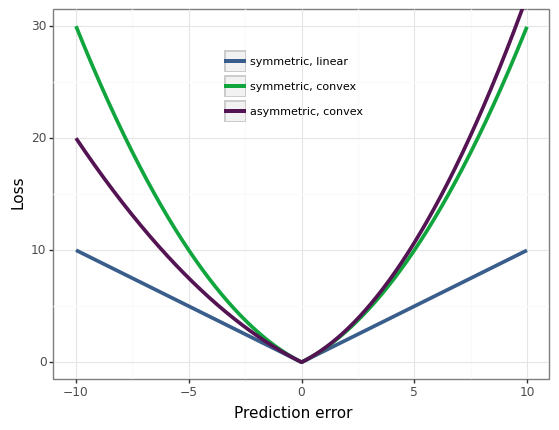

<ggplot: (398148322)>

In [21]:
(
    ggplot(data, aes(x="x"))
    + geom_line(aes(y="y", color="color"), size=1.5)
    + coord_cartesian(ylim=(0, 30))
    + scale_color_manual(
        values=color[0:3],
        labels=("symmetric, linear", "symmetric, convex", "asymmetric, convex"),
    )
    + labs(y="Loss", x="Prediction error")
    + theme_bw()
    + theme(
        legend_position=(0.5, 0.72),
        legend_text=element_text(size=8),
        legend_title=element_blank(),
        legend_direction="vertical",
        legend_background=element_blank(),
        legend_box_background=element_rect(color="white"),
    )
)

In [11]:
x = np.arange(1, 21, 1)
original = [
    100,
    90,
    81,
    73,
    67,
    62,
    58,
    55,
    52,
    50,
    48,
    47,
    46,
    45,
    44,
    43,
    42,
    41,
    40,
    39,
]
live = [100, 91, 82, 74, 68, 64, 60, 57, 54, 52, 51, 51, 52, 54, 57, 59, 62, 64, 66, 68]

data = pd.DataFrame({"x": x, "original": original, "live": live})


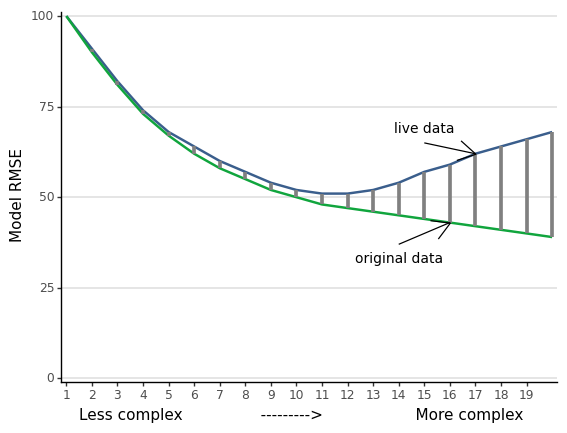

<ggplot: (394749895)>

In [12]:
(
    ggplot(data, aes(x=x, y=live))
    + geom_line(size=1, color=color[0])
    + geom_line(aes(x="x", y="original"), size=1, color=color[1])
    + geom_linerange(aes(x="x", ymin=original, ymax=live), size=1.5, color="grey")
    + annotate(
        geom="segment",
        xend=17,
        yend=data.loc[data["x"] == 17, "live"].values,
        x=15,
        y=data.loc[data["x"] == 15, "live"].values + 8,
        arrow=arrow(),
    )
    + annotate(
        geom="text",
        x=15,
        y=data.loc[data["x"] == 15, "live"].values + 12,
        label="live data",
        size=10,
    )
    + annotate(
        geom="segment",
        xend=16,
        yend=data.loc[data["x"] == 16, "original"].values,
        x=14,
        y=data.loc[data["x"] == 14, "original"].values - 8,
        arrow=arrow(),
    )
    + annotate(
        geom="text",
        x=14,
        y=data.loc[data["x"] == 14, "original"].values - 12,
        label="original data",
        size=10,
    )
    + scale_y_continuous(expand=(0.01, 0.01), limits=(0, 100))
    + scale_x_continuous(
        expand=(0.01, 0.01),
        limits=(1, 20),
        breaks=np.arange(1, 20, 1),
    )
    + labs(
        y="Model RMSE",
        x="Less complex                --------->                   More complex",
    )
    + theme_bw()
    + theme(
        panel_border=element_blank(),
        panel_grid_major_x=element_blank(),
        panel_grid_major_y=element_line(size=1.4, alpha=1),
        panel_grid_minor=element_blank(),
        axis_line=element_line(colour="black"),
    )
)


In [13]:
# CHAPTER 22


# ch22-figure-1

x = np.arange(0, 11, 1)
y = np.arange(0, 11, 1)

d1 = pd.DataFrame({"x": x, "y": y, "color": "l1"})
d2 = pd.DataFrame({"x": x, "y": y, "color": "l2"})

data = pd.concat([d1, d2])


In [14]:
d1 = pd.DataFrame({"x": [2, 8], "y": [1, 2], "color": "l1"})
d2 = pd.DataFrame({"x": [2, 8], "y": [3, 5.5], "color": "l2"})
d3 = pd.DataFrame({"x": [2, 8], "y": [3, 4], "color": "l2"})

data = pd.concat([d1, d2, d3])


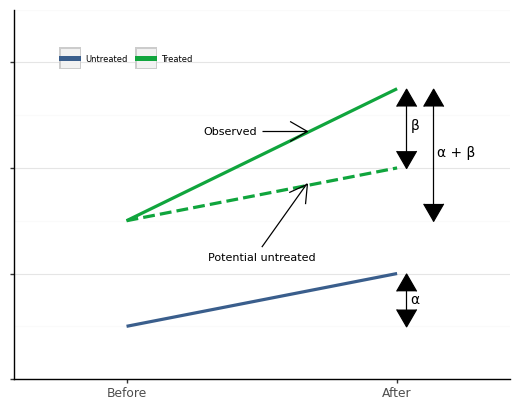

<ggplot: (395117252)>

In [15]:
alpha_carcode = "\u03B1"
beta_carcode = "\u03B2"

(
    ggplot(data, aes(x="x", y="y", color="color"))
    + geom_line(d1, size=1.3)
    + geom_line(d2, size=1.3)
    + geom_line(d3, size=1.3, linetype="dashed")
    + annotate(geom="segment", xend=6, yend=4.7, x=5, y=4.7, arrow=arrow())
    + annotate(geom="text", x=4.3, y=4.7, label="Observed", size=8)
    + annotate(geom="segment", xend=6, yend=3.7, x=5, y=2.5, arrow=arrow())
    + annotate(geom="text", x=5, y=2.3, label="Potential untreated", size=8)
    + annotate(geom="text", x=8.4, y=1.5, label=alpha_carcode, size=10)
    + annotate(geom="text", x=8.4, y=4.8, label=beta_carcode, size=10)
    + annotate(
        geom="text", x=9.3, y=4.3, label=alpha_carcode + " + " + beta_carcode, size=10
    )
    + annotate(
        geom="segment",
        xend=8.2,
        yend=1,
        x=8.2,
        y=2,
        arrow=arrow(type="closed", ends="both"),
    )
    + annotate(
        geom="segment",
        xend=8.2,
        yend=4,
        x=8.2,
        y=5.5,
        arrow=arrow(type="closed", ends="both"),
    )
    + annotate(
        geom="segment",
        xend=8.8,
        yend=3,
        x=8.8,
        y=5.5,
        arrow=arrow(type="closed", ends="both"),
    )
    + scale_y_continuous(expand=(0, 0), limits=(0, 7), labels=("", "", "", "", ""))
    + scale_x_continuous(breaks=(2, 8), limits=(0, 10), labels=("Before", "After"))
    + scale_color_manual(values=color[0:2], name=" ", labels=("Untreated", "Treated"))
    + labs(y="", x="")
    + theme_bw()
    + theme(
        legend_position=(0.3, 0.8),
        legend_text=element_text(size=6),
        legend_background=element_blank(),
        legend_box_background=element_rect(color="white"),
        panel_border=element_blank(),
        panel_grid_major_x=element_blank(),
        panel_grid_minor_x=element_blank(),
        axis_line=element_line(colour="black"),
    )
)